In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
# import dataset

df = pd.read_csv('../data-cleaning/dataset/combineddata.csv')

In [4]:
df.head()


,powder,salt,oil,edible,vegetable,wheat,flour,sugar,chilli,red,...,tocopheryl,triethanolamine,cl,titanium,dioxide,root,stearate,orange,honey,TYPE
0,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TYPE', axis=1), df['TYPE'], test_size=0.33, random_state=42)

In [6]:
# Random Forest

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [7]:
y_predicted = rf.predict(X_test)

In [8]:
accuracy_score(y_test, y_predicted)

0.8709677419354839

In [9]:
y_predicted_train = rf.predict(X_train)
accuracy_score(y_train, y_predicted_train)

0.88

In [10]:
cm = confusion_matrix(y_test, y_predicted)

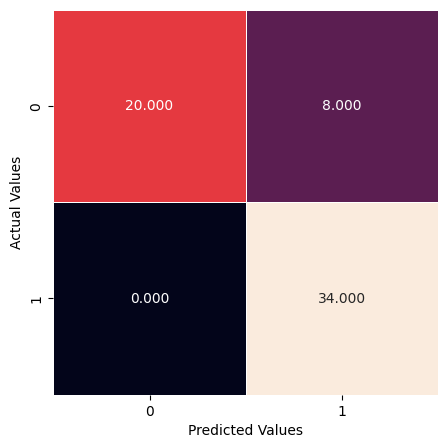

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [12]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        28
           1       0.81      1.00      0.89        34

    accuracy                           0.87        62
   macro avg       0.90      0.86      0.86        62
weighted avg       0.90      0.87      0.87        62

